# Bibliothèques 

In [1]:
import pickle
from collections import Counter
import os
import torch
import matplotlib.pyplot as plt
import pandas as pd
import torchvision
import torchvision.transforms as transforms
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report

from imblearn.over_sampling import RandomOverSampler
from tensorflow import keras
from keras.layers import *
from keras.models import Model
from keras import optimizers, Sequential
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns

2023-08-25 12:35:33.106666: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Préparation de données

In [2]:
directory= "/Users/sokhna/Desktop/github/CIFAR-Imbalanced-workshop"
data= os.path.join(directory,'imbalanced_data.pkl')
test_data= os.path.join(directory,'test_data.pkl')
# Load the imbalanced data
with open(data, 'rb') as f:
    imbalanced_data = pickle.load(f)
#Load the test_data
with open(test_data, 'rb') as f:
    X_val = pickle.load(f)

In [3]:
# Extract labels
labels = [label for _, label in imbalanced_data]

# Count the number of instances per class
class_counts = Counter(labels)

# Print class counts
for class_label, count in class_counts.items():
    print(f'Class {class_label} has {count} instances')

# Print total number of classes
print(f'Total number of classes: {len(class_counts)}')



Class 3 has 500 instances
Class 6 has 5000 instances
Class 9 has 5000 instances
Class 4 has 5000 instances
Class 1 has 5000 instances
Class 2 has 5000 instances
Class 7 has 5000 instances
Class 8 has 5000 instances
Class 5 has 5000 instances
Class 0 has 5000 instances
Total number of classes: 10


In [4]:
print(class_counts)

Counter({6: 5000, 9: 5000, 4: 5000, 1: 5000, 2: 5000, 7: 5000, 8: 5000, 5: 5000, 0: 5000, 3: 500})


In [5]:
df = pd.DataFrame(imbalanced_data, columns = ['image','class'])
df['class'].value_counts()

6    5000
9    5000
4    5000
1    5000
2    5000
7    5000
8    5000
5    5000
0    5000
3     500
Name: class, dtype: int64

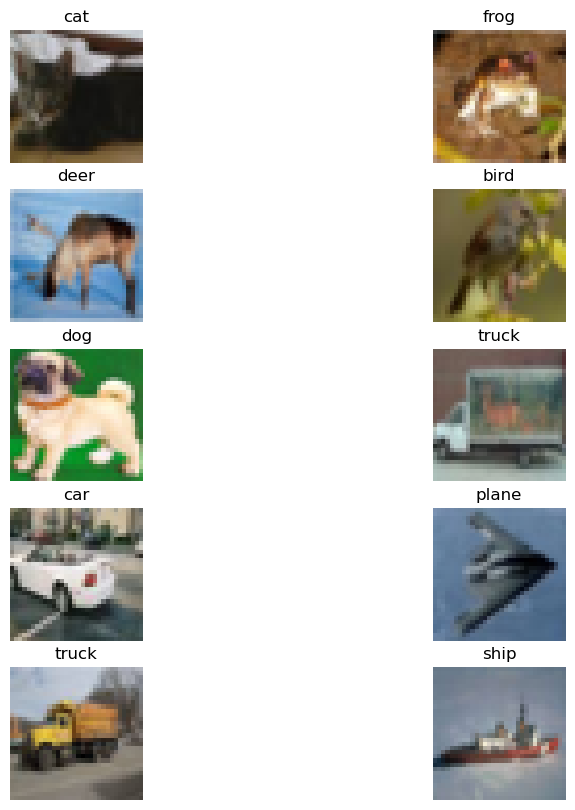

In [6]:
# Plot example images from each class
# Define class names

class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Define figure size
plt.figure(figsize=(10, 10))

# Extract images and labels
images, labels = zip(*imbalanced_data)

# plot example of each images
idx = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]
for id in idx:
    plt.subplot(5, 2, idx.index(id) + 1)
    plt.imshow(images[id])
    plt.title(class_names[labels[id]])
    plt.axis('off')
    

In [7]:
#def du train et du test
y= df['class']
X= df['image']

for i in range(len(X)):
    X.iloc[i]= np.array(X.iloc[i])
    

    

/var/folders/2l/7w9nqq4j6yg4l3fdjxf35jqm0000gn/T/ipykernel_754/1252837577.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.iloc[i]= np.array(X.iloc[i])


In [8]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

In [9]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=42)

X_train=np.array(X_train)
X_train=X_train.reshape(-1,1)

X_test=np.array(X_test)
X_test=X_test.reshape(-1,1)

y_train=np.array(y_train)
y_test=np.array(y_test)
# oversampling 

X_traino, y_traino = oversample.fit_resample(X_train, y_train)
X_testo, y_testo = oversample.fit_resample(X_test, y_test)

class_counts_train = Counter(y_traino)
class_counts_test = Counter(y_testo)
v_max_train=max(class_counts_train.values())
v_max_test=max(class_counts_test.values())

list01=[v_max_train for _ in range (10)]
list02=[v_max_test for _ in range (10)]
list1 =list(class_counts_train.values())
list2 =list(class_counts_test.values())


while(list1!=list01):
    X_traino, y_traino = oversample.fit_resample(X_traino, y_traino)
    class_counts_train = Counter(y_traino)
    list1 =list(class_counts_train.values())

while(list2!=list02):
    X_testo, y_testo = oversample.fit_resample(X_testo, y_testo)
    class_counts_test = Counter(y_testo)
    list2 =list(class_counts_test.values())
    
# Count the number of instances per class
class_counts_train = Counter(y_traino)

# Print class counts
for class_label, count in class_counts_train.items():
    print(f'Class {class_label} in trainset has {count} instances')

# Print total number of classes
print(f'Total number of classes in trainset: {len(class_counts)}')

# Count the number of instances per class
class_counts_test = Counter(y_testo)

# Print class counts
for class_label, count in class_counts_test.items():
    print(f'Class {class_label} in testset has {count} instances')

# Print total number of classes
print(f'Total number of classes in test set: {len(class_counts)}')

#reshape
X_traino=np.array([X_traino[i][0].reshape(32,32,3) for i in range(len(X_traino))])
X_test=np.array([X_test[i][0].reshape(32,32, 3) for i in range(len(X_test))])
y_traino=y_traino.reshape(y_traino.shape[0],1)
y_test=y_test.reshape(y_test.shape[0],1)

#Normalisation


X_traino= X_traino/255
X_test=X_test/255

#print((min (X_traino[0][0]),max (X_traino[0][0])))

#Convertir les labels en One Hot Encoded
classes=10
#y_traino= keras.utils.to_categorical(y_traino, classes)
#y_testo= keras.utils.to_categorical(y_testo, classes)


print(y_testo[0])
#print('x_train shape:', X_traino.shape)
#print('y_train shape:', y_traino.shape)
#print(x_train.shape[0], 'train samples')
#print(x_test.shape[0], 'test samples')
#print('x_test shape:', X_test.shape)
#print('y_test shape:', y_test.shape)

Class 1 in trainset has 3800 instances
Class 9 in trainset has 3800 instances
Class 2 in trainset has 3800 instances
Class 0 in trainset has 3800 instances
Class 8 in trainset has 3800 instances
Class 6 in trainset has 3800 instances
Class 7 in trainset has 3800 instances
Class 5 in trainset has 3800 instances
Class 4 in trainset has 3800 instances
Class 3 in trainset has 3800 instances
Total number of classes in trainset: 10
Class 5 in testset has 1284 instances
Class 1 in testset has 1284 instances
Class 0 in testset has 1284 instances
Class 2 in testset has 1284 instances
Class 8 in testset has 1284 instances
Class 6 in testset has 1284 instances
Class 9 in testset has 1284 instances
Class 4 in testset has 1284 instances
Class 7 in testset has 1284 instances
Class 3 in testset has 1284 instances
Total number of classes in test set: 10
5


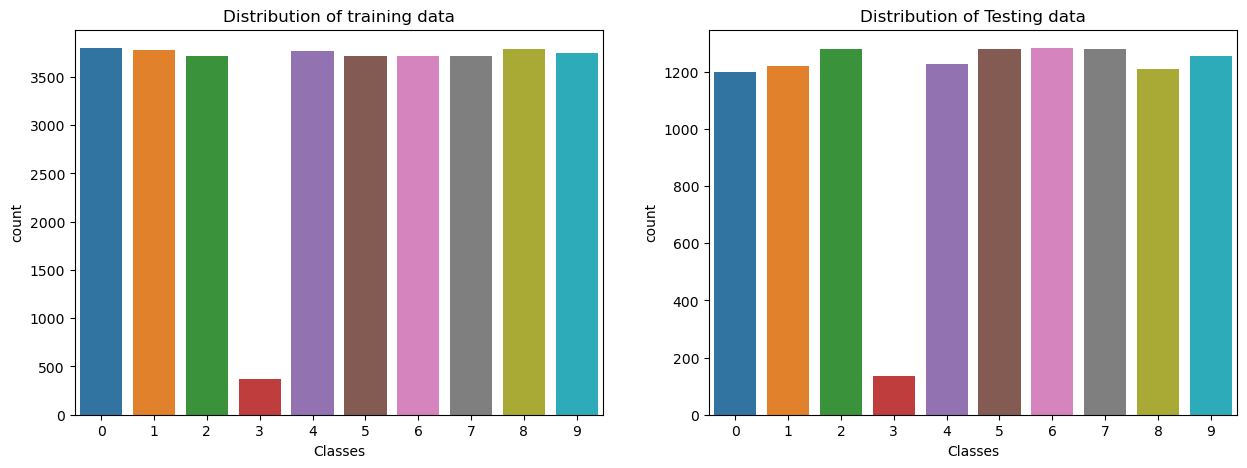

In [10]:
#Before oversampling
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# Count plot for training set
sns.countplot(x=y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(x=y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

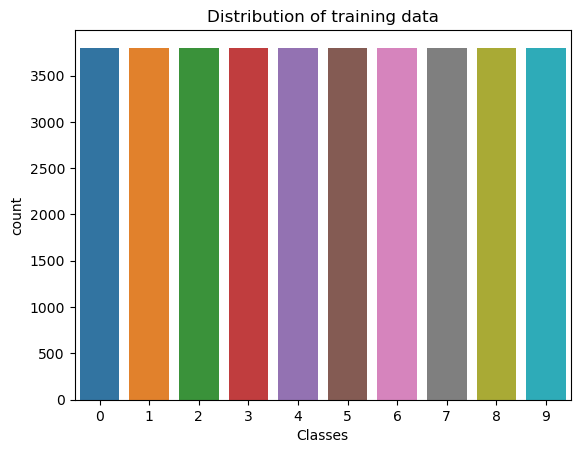

In [11]:
#After oversampling
# Count plot for training set
fig=sns.countplot(x=y_traino.ravel())
fig.set_title('Distribution of training data')
fig.set_xlabel('Classes')
plt.show()

In [12]:
print('x_train shape:', X_traino.shape)
print('y_train shape:', y_traino.shape)
print(X_traino.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print('x_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (38000, 32, 32, 3)
y_train shape: (38000, 1)
38000 train samples
11375 test samples
x_test shape: (11375, 32, 32, 3)
y_test shape: (11375, 1)


In [13]:
X_train=np.array([X_train[i][0].reshape(32,32,3) for i in range(len(X_train))])
y_train=y_train.reshape(y_train.shape[0],1)


#Auto Keras
#%% initialize the clasifier
import autokeras as ak


clf=ak.ImageClassifier(
    overwrite=True,
    max_trials=1)

#feed the image classifier
history=clf.fit(X_train,y_train)
#history=clf.fit(X_traino,y_traino)

model_ak = clf.export_model()
model_ak.summary()

Trial 1 Complete [00h 13m 34s]
val_loss: 0.8306492567062378

Best val_loss So Far: 0.8306492567062378
Total elapsed time: 00h 13m 34s
INFO:tensorflow:Oracle triggered exit
Epoch 1/8
1067/1067 [==============================] - 58s 54ms/step - loss: 1.2982 - accuracy: 0.5441
Epoch 2/8
1067/1067 [==============================] - 56s 52ms/step - loss: 0.9969 - accuracy: 0.6549
Epoch 3/8
1067/1067 [==============================] - 55s 51ms/step - loss: 0.8950 - accuracy: 0.6919
Epoch 4/8
1067/1067 [==============================] - 58s 55ms/step - loss: 0.8283 - accuracy: 0.7133
Epoch 5/8
1067/1067 [==============================] - 56s 52ms/step - loss: 0.7821 - accuracy: 0.7300
Epoch 6/8
1067/1067 [==============================] - 55s 52ms/step - loss: 0.7483 - accuracy: 0.7397
Epoch 7/8
1067/1067 [==============================] - 55s 52ms/step - loss: 0.7127 - accuracy: 0.7517
Epoch 8/8
1067/1067 [==============================] - 57s 54ms/step - loss: 0.6877 - accuracy: 0.7606
INFO

INFO:tensorflow:Assets written to: ./image_classifier/best_model/assets


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 cast_to_float32 (CastToFlo  (None, 32, 32, 3)         0         
 at32)                                                           
                                                                 
 normalization (Normalizati  (None, 32, 32, 3)         7         
 on)                                                             
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0     

In [14]:

from sklearn.metrics import f1_score, roc_auc_score, average_precision_score
y_pred = model_ak.predict(X_test)
y_pred_class=np.argmax(y_pred,axis=1)
y_pred_val = model_ak.predict(X_val)
y_pred_val=np.argmax(y_pred,axis=1)
print(classification_report(y_test,y_pred_class))

313/313 [==============================] - 3s 10ms/step


NameError: name 'y_true' is not defined

In [15]:
# Score trained model.
scores = model_ak.evaluate(X_test, y_test, verbose=1)
y_true = np.argmax(y_test, axis=1)

print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
test_pred = model_ak.predict(X_test)
y_test_pred=np.argmax(test_pred,axis=1)
print(classification_report(y_true,y_test_pred))

ValueError: in user code:

    File "/Users/sokhna/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1972, in test_function  *
        return step_function(self, iterator)
    File "/Users/sokhna/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1956, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/sokhna/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1944, in run_step  **
        outputs = model.test_step(data)
    File "/Users/sokhna/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1852, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/sokhna/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "/Users/sokhna/anaconda3/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/sokhna/anaconda3/lib/python3.11/site-packages/keras/src/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/sokhna/anaconda3/lib/python3.11/site-packages/keras/src/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/sokhna/anaconda3/lib/python3.11/site-packages/keras/src/losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/sokhna/anaconda3/lib/python3.11/site-packages/keras/src/backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [16]:
batch_size = 32  # The default batch size of keras.
num_classes = 10  # Number of class for the dataset
epochs = 100
data_augmentation = False


In [17]:
# Convert class vectors to binary class matrices. This is called one hot encoding.
y_traino = keras.utils.to_categorical(y_traino, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [18]:
#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=X_traino.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 15, 15, 32)        0         
                                                        

In [19]:

# initiate RMSprop optimizer
#opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
opt=keras.optimizers.Adam(learning_rate=1e-4)
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [20]:
history = None  # For recording the history of trainning process.
if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(X_traino, y_traino,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(X_traino)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(datagen.flow(X_traino, y_traino,
                                    batch_size=batch_size),
                                    epochs=epochs,
                                    validation_data=(X_test, y_test),
                                    workers=4)

Not using data augmentation.
Epoch 1/100
1188/1188 [==============================] - 93s 77ms/step - loss: 1.8248 - accuracy: 0.3293 - val_loss: 1.5444 - val_accuracy: 0.4442
Epoch 2/100
1188/1188 [==============================] - 98s 82ms/step - loss: 1.4626 - accuracy: 0.4711 - val_loss: 1.2955 - val_accuracy: 0.5386
Epoch 3/100
1188/1188 [==============================] - 92s 78ms/step - loss: 1.3123 - accuracy: 0.5322 - val_loss: 1.1917 - val_accuracy: 0.5814
Epoch 4/100
1188/1188 [==============================] - 91s 77ms/step - loss: 1.2195 - accuracy: 0.5685 - val_loss: 1.1261 - val_accuracy: 0.6091
Epoch 5/100
1188/1188 [==============================] - 346s 291ms/step - loss: 1.1376 - accuracy: 0.6036 - val_loss: 1.0472 - val_accuracy: 0.6404
Epoch 6/100
1188/1188 [==============================] - 96s 81ms/step - loss: 1.0683 - accuracy: 0.6296 - val_loss: 1.0232 - val_accuracy: 0.6446
Epoch 7/100
1188/1188 [==============================] - 94s 79ms/step - loss: 1.0109 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


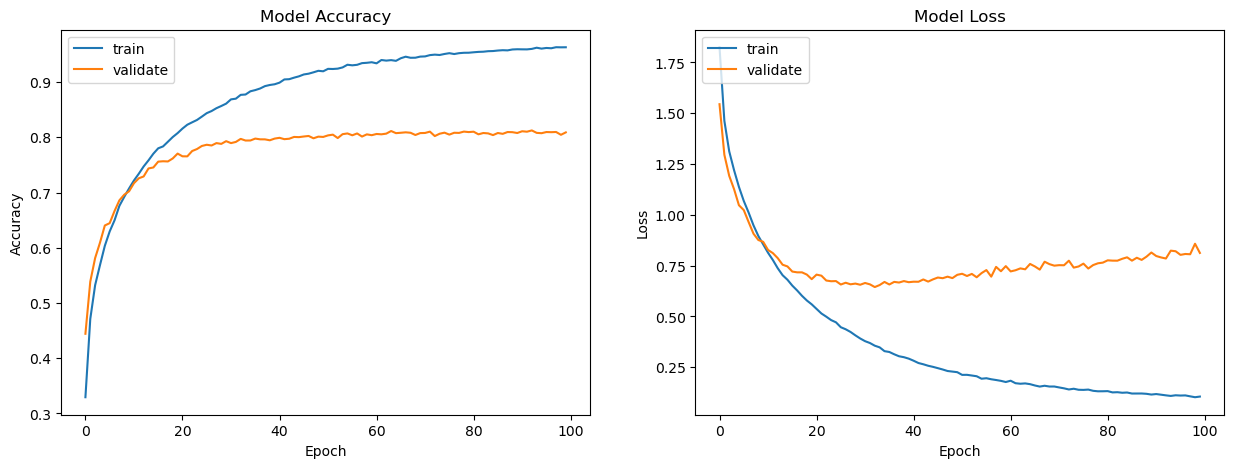

In [21]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

In [22]:
# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
y_true = np.argmax(y_test, axis=1)

print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
test_pred = model.predict(X_test)
print(classification_report(y_true,y_test_pred))



356/356 [==============================] - 5s 15ms/step - loss: 0.8123 - accuracy: 0.8090
Test loss: 0.8123132586479187
Test accuracy: 0.8089670538902283
356/356 [==============================] - 6s 16ms/step
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1200
           1       0.86      0.90      0.88      1220
           2       0.76      0.69      0.72      1281
           3       0.27      0.12      0.16       134
           4       0.74      0.77      0.76      1229
           5       0.75      0.78      0.76      1280
           6       0.84      0.83      0.84      1284
           7       0.83      0.83      0.83      1279
           8       0.88      0.87      0.87      1212
           9       0.85      0.86      0.86      1256

    accuracy                           0.81     11375
   macro avg       0.76      0.75      0.75     11375
weighted avg       0.81      0.81      0.81     11375



In [23]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    ax.set_xlabel('Predicted Label') 
    ax.set_ylabel('True Label')
    
    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

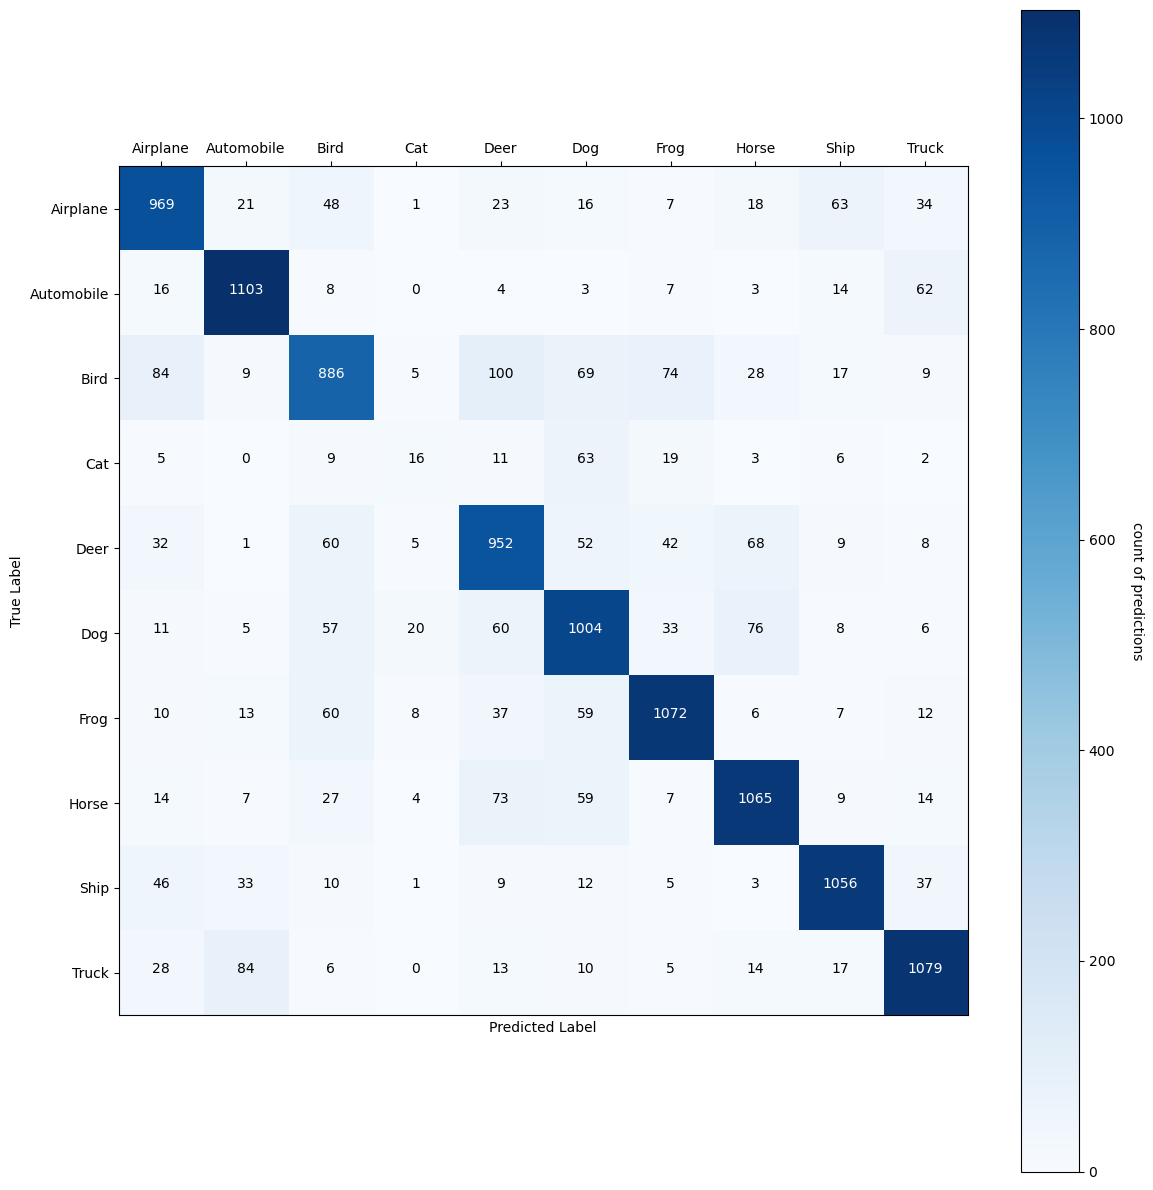

In [24]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(test_pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = test_pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = X_test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes) 
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

In [25]:
# make soumission.
prediction_keras=os.path.join(directory,'prediction_cnn.pkl')
pred_soumission = model.predict(X_val)
y_pred_soumission=np.argmax(pred_soumission,axis=1)
with open(prediction_keras, 'wb') as f:
    pickle.dump(y_pred_soumission, f)

313/313 [==============================] - 5s 17ms/step


In [26]:
#define the convnet
model1 = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model1.add(Conv2D(32, (3, 3), padding='same',input_shape=X_traino.shape[1:]))
model1.add(Activation('relu'))
model1.add(Conv2D(32, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model1.add(Conv2D(64, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(Conv2D(64, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
# a softmax classifier
model1.add(Dense(num_classes))
model1.add(Activation('softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 15, 15, 32)        0         
                                                      

In [27]:


# initiate RMSprop optimizer
#opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
opt=keras.optimizers.Adam(learning_rate=1e-4)
# Let's train the model using RMSprop
model1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    zca_epsilon=1e-06,  # epsilon for ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0.,  # set range for random shear
    zoom_range=0.,  # set range for random zoom
    channel_shift_range=0.,  # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0.,  # value used for fill_mode = "constant"
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,  # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(X_traino)

# Fit the model on the batches generated by datagen.flow().
history1 = model1.fit_generator(datagen.flow(X_traino, y_traino,
                            batch_size=batch_size),
                            epochs=epochs,
                            validation_data=(X_test, y_test),
                            workers=4)

Using real-time data augmentation.
Epoch 1/100


/var/folders/2l/7w9nqq4j6yg4l3fdjxf35jqm0000gn/T/ipykernel_754/2996278814.py:45: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1 = model1.fit_generator(datagen.flow(X_traino, y_traino,


1188/1188 [==============================] - 112s 93ms/step - loss: 1.9125 - accuracy: 0.2904 - val_loss: 1.5468 - val_accuracy: 0.4542
Epoch 2/100
1188/1188 [==============================] - 116s 98ms/step - loss: 1.5993 - accuracy: 0.4155 - val_loss: 1.4522 - val_accuracy: 0.4778
Epoch 3/100
1188/1188 [==============================] - 105s 88ms/step - loss: 1.4914 - accuracy: 0.4573 - val_loss: 1.2981 - val_accuracy: 0.5408
Epoch 4/100
1188/1188 [==============================] - 104s 88ms/step - loss: 1.4136 - accuracy: 0.4899 - val_loss: 1.3006 - val_accuracy: 0.5353
Epoch 5/100
1188/1188 [==============================] - 105s 89ms/step - loss: 1.3538 - accuracy: 0.5157 - val_loss: 1.1553 - val_accuracy: 0.5902
Epoch 6/100
1188/1188 [==============================] - 109s 92ms/step - loss: 1.3012 - accuracy: 0.5364 - val_loss: 1.1396 - val_accuracy: 0.6004
Epoch 7/100
1188/1188 [==============================] - 102s 86ms/step - loss: 1.2518 - accuracy: 0.5569 - val_loss: 1.1013

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


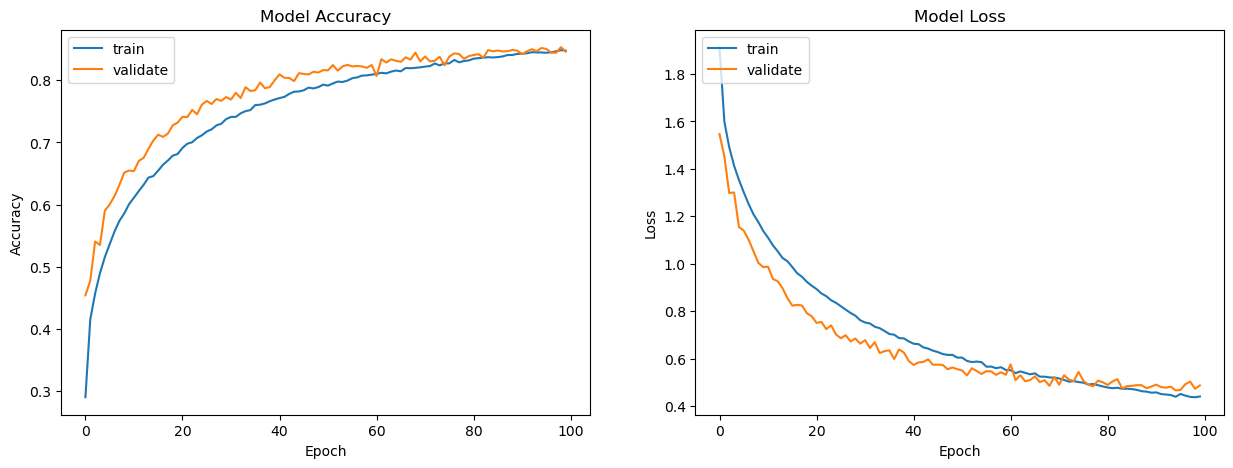

In [28]:
print(history1.history.keys())

plotmodelhistory(history1)

In [29]:
# Score trained model.
scores1 = model1.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores1[0])
print('Test accuracy:', scores1[1])

# make prediction.
pred1 = model1.predict(X_test)

356/356 [==============================] - 5s 14ms/step - loss: 0.4875 - accuracy: 0.8462
Test loss: 0.48753949999809265
Test accuracy: 0.8461538553237915
356/356 [==============================] - 5s 14ms/step


356/356 [==============================] - 5s 14ms/step


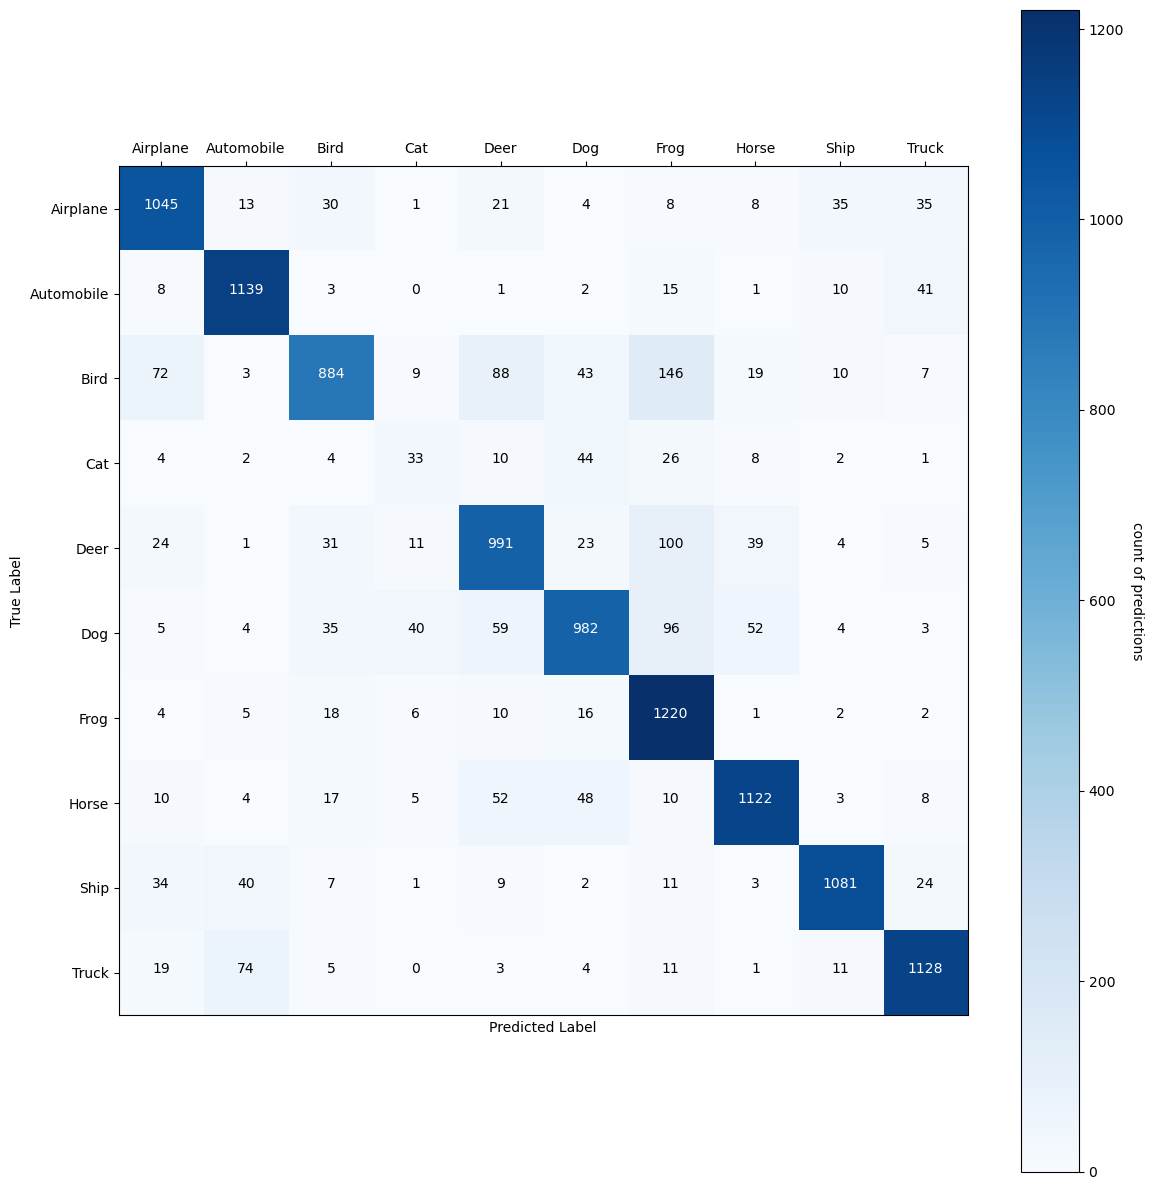

In [30]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
test_pred_1 = model1.predict(X_test)

# Convert predictions classes to one hot vectors 
Y_pred_classes1 = np.argmax(test_pred_1, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes1 - Y_true != 0)

Y_pred_classes_errors1 = Y_pred_classes1[errors]
Y_pred_errors1 = test_pred_1[errors]
Y_true_errors1 = Y_true[errors]
X_test_errors1 = X_test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes1) 
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

In [31]:
# Score trained model.
scores1 = model1.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
test_pred1 = model1.predict(X_test)
y_test_pred1=np.argmax(test_pred1,axis=1)
print(classification_report(y_true,y_test_pred1))


356/356 [==============================] - 5s 14ms/step - loss: 0.4875 - accuracy: 0.8462
Test loss: 0.8123132586479187
Test accuracy: 0.8089670538902283
356/356 [==============================] - 5s 14ms/step
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1200
           1       0.89      0.93      0.91      1220
           2       0.85      0.69      0.76      1281
           3       0.31      0.25      0.28       134
           4       0.80      0.81      0.80      1229
           5       0.84      0.77      0.80      1280
           6       0.74      0.95      0.83      1284
           7       0.89      0.88      0.89      1279
           8       0.93      0.89      0.91      1212
           9       0.90      0.90      0.90      1256

    accuracy                           0.85     11375
   macro avg       0.80      0.79      0.79     11375
weighted avg       0.85      0.85      0.84     11375



In [32]:
# make soumission.
prediction_dg=os.path.join(directory,'prediction_data_aug.pkl')
pred_soumission1 = model1.predict(X_val)
y_pred_soumission=np.argmax(pred_soumission1,axis=1)
with open(prediction_dg, 'wb') as f:
    pickle.dump(y_pred_soumission, f)

313/313 [==============================] - 4s 14ms/step
